#Research Goals for Titanic data set:
# How are the features correlated with survivability?
# Can these features be used to predict survivability using machine learning algorithms?


# Step 1: Initial Data import 

In [0]:
#Necessary imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Downloaded titanic data set from Kaggle https://www.kaggle.com/c/titanic/data
#Uploaded CSV file to drive using method found in this website: https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

from google.colab import files
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
#Assigns data in csv to data frame called titanic
titanic = pd.read_csv('train.csv')

In [0]:
#First look at data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**Looks like we have data for 891 passengers (although there seems to be some discrepencies in the total amount of data in certain columns)**

In [0]:
print(titanic.columns)
len(titanic.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


12

**And we know these 12 attributes associated with them**

In [0]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Overall, it appears as though more people did not survive the Titanic in this particular data set**

# Step 2: Data Clean-up

**Lets check if we have any incomplete data**

In [0]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**It appears that Age and cabin have a large number of missing values, lets visualize this:**

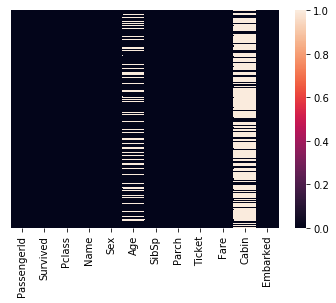

In [0]:
sns.heatmap(titanic.isnull(),yticklabels=False)

**Each white tick-mark in the heatmap represents a null value. Because of the large amount of missing values and the fact that I am not confident in filling in this values accurately based on the other features, I will drop these columns.**

In [0]:
#Dropping Age and Cabin columns
titanic_clean = titanic.drop(columns = ['Age', 'Cabin'])

In [0]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [0]:
titanic_clean['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**The ticket columns does not look particularly useful for determining passenger survivability. For this reason, it will also be dropped.**

In [0]:
titanic_clean.drop(columns = ['Ticket'], inplace=True)

In [0]:
titanic_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S


**According to this forum: https://www.kaggle.com/c/titanic/discussion/2881, the SibSp and Parch features describe the "Number of Siblings/Spouses aboard" and "Number of Children/Parents aboard" respectively. These seem like useful features that should be kept.**

**Although the Name feature is useful for historical/documentation purposes, I don't think it will provide any additional predictive information. The only way in which it may be useful is if I extracted the title (Mr., Mrs., etc) and added it as an additional feature; however, related information is already encapsulated in the SibSp and Parch features. These two features help characterize their familial status.**
**The PassengerID is also irrelevant as it is simply an additional index for the data.**

In [0]:
#Dropping Name and PassengerId columns
titanic_clean = titanic_clean.drop(columns = ['Name', 'PassengerId'])

In [0]:
titanic_clean.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


# Step 3: Visualizaton 

**Lets start with a pairplot to see what we're working with.** 

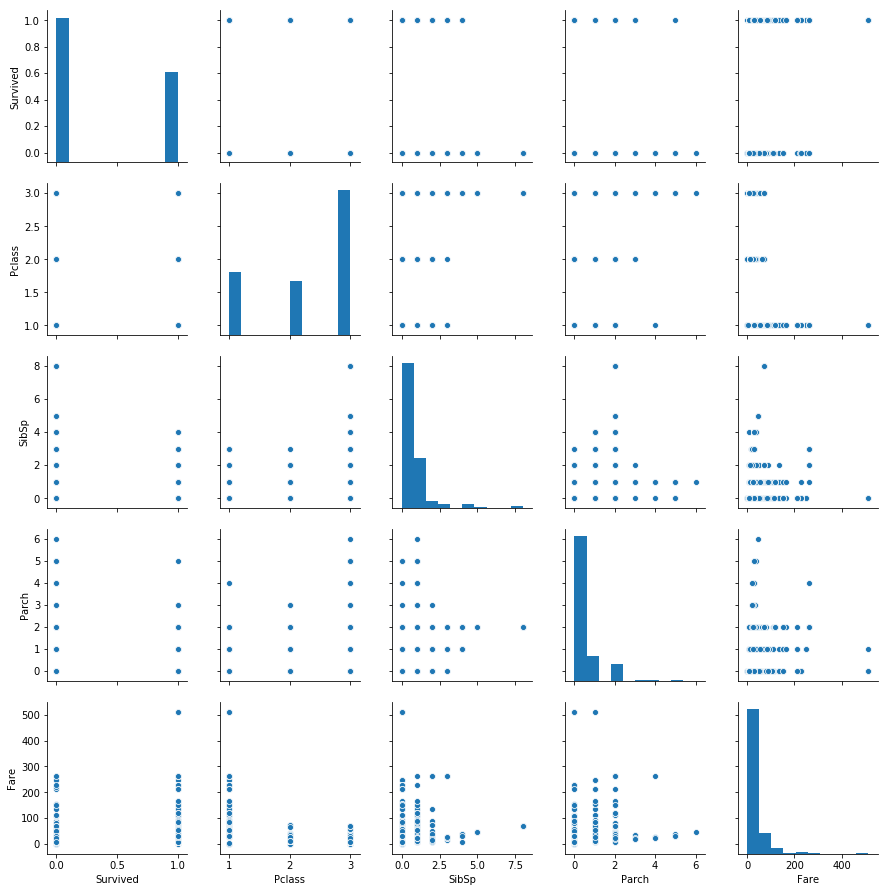

In [0]:
sns.pairplot(titanic_clean)

**It looks like the data follows several discrete patterns. The most import of which is dead or alive (0 or 1). Lets look at the features that may be most correlated with survivability.**

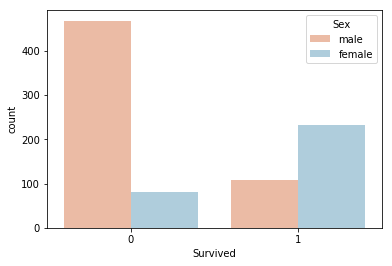

In [0]:
#Displays total number of survivers and deaths, color coded by sex
sns.countplot(x='Survived', data=titanic_clean, hue='Sex', palette='RdBu')

**Looks like men were way more likely to die and women were more likely to survive!**

**Now lets looks at SibSp and Parch**

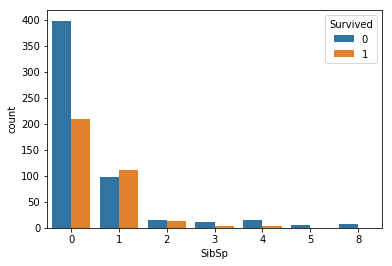

In [0]:
countplot1 = sns.countplot(x='SibSp', data=titanic_clean, hue='Survived')
countplot1.legend(loc=1, title='Survived')

In [0]:
titanic_clean[titanic_clean['SibSp'] >= 2]['SibSp'].count()

74

**A majority of the passengers had only 0 or 1 siblings onboard, very few have two or more (only 74 out of the 891 passengers).**

**When comparing 0 siblings and 1 sibling, it appears that a higher proportion of individuals with no siblings did not survive.**

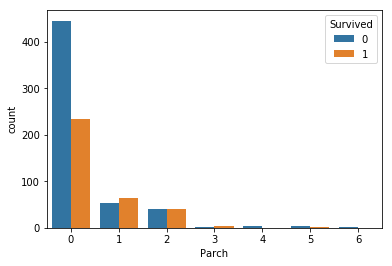

In [0]:
countplot2 = sns.countplot(x='Parch', data=titanic_clean, hue='Survived')
countplot2.legend(loc=1, title='Survived')

In [0]:
titanic_clean[titanic_clean['Parch'] >= 3]['Parch'].count()

15

**Parch follows a similar trend. A vast majority of the passengers had only 0, 1, or 2 parents/children onboard, very few have three or more (only 15 out of the 891 passengers).**

**When comparing 0 parents/children to 1 and 2 parents/childrens, it appears that a higher proportion of individuals with no parents/children did not survive.**

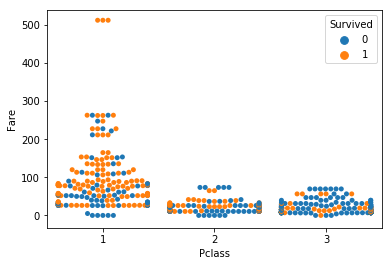

In [0]:
sns.swarmplot(x='Pclass', y='Fare', data=titanic_clean, hue='Survived')

**This swarm plot groups by cabin class on the x axis while the y axis is the continous Fare variable. As one would expect, the first class passengers payed far more for their ticket than second and third class passengers. Furthermore, the first class passenger seemed to have had a higher liklihood of surviving (more orange dots). The second and third class passenger survivability seems largely the same.**

# Step 4 Prediction

**Lets create a logistic regression model that predicts whether a passenger will survive or die. Logistic regression should be perfect for this since it has a 0/1 no/yes probability output.**
**First, in order to input all our features into the data set, we need to transform the categorical variables Sex and Embarked into a quantitative feature**

In [0]:
#Pandas built-in dummy variable function 
Sex_quantitative = pd.get_dummies(titanic_clean['Sex'])
Embark_quantitative = pd.get_dummies(titanic_clean['Embarked'])

In [0]:
#Dropping original categorical feature columns
titanic_clean = titanic_clean.drop(columns = ['Sex', 'Embarked'])

In [0]:
titanic_clean = pd.concat([titanic_clean, Sex_quantitative, Embark_quantitative], axis=1)

In [0]:
titanic_clean.head()

,Survived,Pclass,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,1,0,7.2500,0,1,0,0,1
1,1,1,1,0,71.2833,1,0,1,0,0
2,1,3,0,0,7.9250,1,0,0,0,1
3,1,1,1,0,53.1000,1,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,1


**Now lets create the model**

In [0]:
#Import neccesary library for splitting training and test data
from sklearn.model_selection import train_test_split

In [0]:
#Splitting original data set into training data/labels and testing data/labels
X_train, X_test, y_train, y_test = train_test_split(titanic_clean.drop('Survived',axis=1), titanic_clean['Survived'], test_size=0.30, random_state=42)

In [0]:
#Import logistic regression model 
from sklearn.linear_model import LogisticRegression

In [0]:
#Creating model and training on the training data/labels
LogRegression  = LogisticRegression()
LogRegression.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#Make predictions on the 30% of the data that was saved for testing/validation
predictions = LogRegression.predict(X_test)

In [0]:
#Neccesary import to test how well the model did
from sklearn.metrics import classification_report

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       157
           1       0.75      0.70      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



# Looks like the model has an overall accuracy of 78%. This won't break any records, but its a start. Further feature engineering may be able to push the model accuracy higher

**Now lets try sklearns built-in neural network (specifically the multi-layer perceptron)**

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
MLP = MLPClassifier(solver='adam', alpha=1e-3, hidden_layer_sizes=(15, 10), random_state=42)

In [0]:
MLP.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=42, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
predictionsMLP = MLP.predict(X_test)

In [0]:
print(classification_report(y_test,predictionsMLP))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       157
           1       0.73      0.73      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



# After playing around with the optimizer, learning rate, and hidden layers, the MLP also reaches 78% accuracy. In the future, implementing a neural network using Keras, TensorFlow, or another more powerful library would most probably lead to a far better accuracy. Using gridsearch may also be able to find a combination of hyperparameters that would lead to a greater accuracy.  

**Another idea is utilizing the passenger age data. For example, I could fill in the null values with the average age of all the passengers with an available age. A seperate predictive model (perhaps a linear regression) could also be trained on the passengers with  age available in in order to more accurately extropolate the missing age data.**